## AST Project 2
### Collaborators: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
### Michigan State University
### AST 304

### <u>  `astro_const.py`
    

In [1]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
"""
Values of physical constants imported from astropy
"""

import astropy.constants as _ac
import astropy.units as _au
import numpy as np
import astro_const as ac

# mathematical constants
from numpy import pi
fourpi = 4.0*pi

# solar mass, radius, luminosity
Msun = _ac.M_sun.value
Rsun = _ac.R_sun.value
Lsun = _ac.L_sun.value

# physical constants from astropy, all in MKS units
G = _ac.G.value
h = _ac.h.value
hbar = _ac.hbar.value
m_e = _ac.m_e.value
m_p = _ac.m_p.value
m_n = _ac.m_n.value
m_u = _ac.u.value
c = _ac.c.value
kB = _ac.k_B.value
pc = _ac.pc.value
au = _ac.au.value
year = _au.year.to(_au.second)
sigmaSB = _ac.sigma_sb.value
Ke = (1/5)*(3/(8*(np.pi)))**(2/3)*(ac.h**2/((ac.m_e)*(ac.m_u)**(5/3)))

if __name__ == "__main__":
    
    constants = [
        ("pi",pi,""),
        ("4*pi",fourpi,""),
        ("solar mass",Msun,"kg"),
        ("solar radius",Rsun,"m"),
        ("solar luminosity",Lsun,"W"),
        ("gravitational constant",G,"m**3 s**-2 kg**-1"),
        ("Planck constant",h,"J s"),
        ("Planck constant, reduced",hbar,"J s"),
        ("electron mass",m_e,"kg"),
        ("proton mass",m_p,"kg"),
        ("neutron mass",m_n,"kg"),
        ("atomic mass unit",m_u,"kg"),
        ("speed of light",c,"m s**-1"),
        ("Boltzmann constant",kB,"J K**-1"),
        ("parsec",pc,"m"),
        ("astronomical unit",au,"m"),
        ("year",year,"s"),
        ("Stefan-Boltzmann constant",sigmaSB,"W m**-2 K**-4")
    ]
    
    
    for const in constants:
        print('{0[0]:28} = {0[1]:11.4e} {0[2]}'.format(const))


pi                           =  3.1416e+00 
4*pi                         =  1.2566e+01 
solar mass                   =  1.9884e+30 kg
solar radius                 =  6.9570e+08 m
solar luminosity             =  3.8280e+26 W
gravitational constant       =  6.6743e-11 m**3 s**-2 kg**-1
Planck constant              =  6.6261e-34 J s
Planck constant, reduced     =  1.0546e-34 J s
electron mass                =  9.1094e-31 kg
proton mass                  =  1.6726e-27 kg
neutron mass                 =  1.6749e-27 kg
atomic mass unit             =  1.6605e-27 kg
speed of light               =  2.9979e+08 m s**-1
Boltzmann constant           =  1.3806e-23 J K**-1
parsec                       =  3.0857e+16 m
astronomical unit            =  1.4960e+11 m
year                         =  3.1558e+07 s
Stefan-Boltzmann constant    =  5.6704e-08 W m**-2 K**-4


### <u> `eos.py`

In [2]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
"""
<The eos module is the starter code for the equation of state. >
"""

import astro_const as ac
import numpy as np

def pressure(rho, mue):
    """
    Arguments
        rho
            mass density (kg/m**3)
        mue
            baryon/electron ratio
    
    Returns
        electron degeneracy pressure (Pascal)
    """
    
    # replace following lines with body of routine
    
    p = (1/5)*(3/(8*(np.pi)))**(2/3)*(ac.h**2/ac.m_e)*(rho/(mue*ac.m_u))**(5/3)
    
    return p

def density(p, mue):
    """
    Arguments
        p
            electron degeneracy pressure (Pascal)
        mue
            baryon/electron ratio
        
    Returns
        mass density (kg/m**3)
    """
    
    # replace following lines with body of routine
    
    rho = ((p/((1/5)*(3/(8*(np.pi)))**(2/3)*(ac.h**2/ac.m_e)))**(3/5))*(mue*ac.m_u)
    
    return rho


### <u> `observations.py`

making plot MR_Joyce.png
writing Joyce-table4.tex


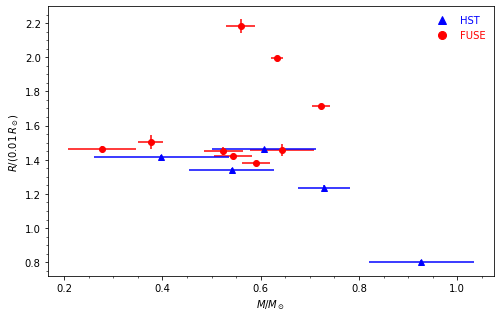

In [3]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
"""
Reads in table 4 of Joyce et al. (2018) containing masses and radii
of white dwarf stars. You should not need to alter this file. The routines
`gen_latex_table` and particularly `make_observation_plot` may be of use.
"""

from numpy import genfromtxt,array

class WhiteDwarf:
    def __init__(self,source,instrument,R,R_err,M,M_err):
        self.source = source
        self.instrument = instrument
        self.radius = R
        self.radius_error = R_err
        self.mass = M
        self.mass_error = M_err      

class MassRadiusObservations:
    """
    Lightweight class storing data complied by Joyce et al. (2018), MNRAS 
    479, 1612 (Table 4).  To use:
    
    In [1]: from observations import MassRadiusObservations

    In [2]: obs = MassRadiusObservations()

    In [3]: obs.masses
    Out[3]: 
    array([0.927, 0.607, 0.643, 0.541, 0.59 , 0.398, 0.277, 0.729, 0.543,
           0.723, 0.559, 0.524, 0.633, 0.376])

    In [4]: obs.radii
    Out[4]: 
    array([0.802, 1.461, 1.457, 1.34 , 1.378, 1.418, 1.464, 1.235, 1.42 ,
           1.717, 2.183, 1.452, 1.993, 1.504])

    In [5]: obs.radius_errors
    Out[5]: 
    array([0.011, 0.009, 0.036, 0.013, 0.011, 0.009, 0.018, 0.018, 0.014,
           0.009, 0.043, 0.024, 0.009, 0.042])
    
    In [6]: for source,info in obs.sources.items():
        ...:     print('{0:20} M = {1:5.3f} +/- {2:5.3f} Msun'.format(source,info.mass,info.mass_error))

    Sirius B             M = 0.927 +/- 0.107 Msun
    HZ43                 M = 0.643 +/- 0.065 Msun
    ...
    and so on.  See the test at bottom for an example.
    """

    def __init__(self):
        self._data = genfromtxt(\
            'Joyce.txt',
            delimiter=[16,12,7,7,12,8],
            names=['source','instrument','R','R_err','M','M_err'],
            dtype=['S16','S12','f8','f8','f8','f8'],
            autostrip=True)
        self._observations = {}
        sources = array([str(s,'utf-8')\
            for s in self._data['source']])
        self._instruments = array([str(s,'utf-8')\
            for s in self._data['instrument']])
        for s, i, m, r, m_e, r_e in zip(sources,
            self._instruments,
            self._data['M'], self._data['R'],
            self._data['M_err'], 
            self._data['R_err']):
            name = '-'.join([s,i])
            self._observations[name] = WhiteDwarf(s,i,r,r_e,m,m_e)

    @property
    def sources(self):
        return self._observations

    @property
    def masses(self):
        return self._data['M']

    @property
    def radii(self):
        return self._data['R']

    @property
    def mass_errors(self):
        return self._data['M_err']
        
    @property
    def radius_errors(self):
        return self._data['R_err']
    
    @property
    def instruments(self):
        return self._instruments

def gen_latex_table(observations):
    """
    Makes a nice latex table of the observations
    
    Arguments
        observations
    Returns
        lines
            an array containing the formatted table
    """
    lines=[ r'\begin{tabular}{llrrrr}' ]
    lines.append(\
    r"source     & instrument & $M$   & $\Delta M$ & $R$ & $\Delta R$ \\")
    lines.append(\
    r"           &     & \multicolumn{2}{c}{$(\Msun)$} & \multicolumn{2}{c}{$(0.01\,\Rsun)$}\\")
    lines.append(r"\hline")

    for obj,wd in observations.sources.items():
        lines.append(r'{0:16s} & {1:4s} & {2:5.3f} & {3:5.3f} & {4:5.3f} & {5:5.3f}\\'.format(\
            wd.source,
            wd.instrument,
            wd.mass,
            wd.mass_error,
            wd.radius,
            wd.radius_error))
    lines.append(r'\end{tabular}')
    return lines

def make_observation_plot(ax,observations):
    """
    Adds the observed data to an axis instance along a legend
    
    Arguments
        ax
            An instance of a matplotlib axes
        observations
            An instance of MassRadiusObservations
    Returns
        ax
            The axes instance so that further items can be added to the plot
    """
    
    ax.set_xlabel(r'$M/M_\odot$')
    ax.set_ylabel(r'$R/(0.01\,R_\odot)$')
    ax.minorticks_on()
    
    # split observations into FUSE and HST observations
    fuse = observations.instruments=='FUSE'
    hst = observations.instruments=='HST'
    ax.errorbar(observations.masses[fuse],observations.radii[fuse],
        yerr=observations.radius_errors[fuse],
        xerr=observations.mass_errors[fuse],
        fmt='ro',markersize=6)
    ax.errorbar(observations.masses[hst],observations.radii[hst],
        yerr=observations.radius_errors[hst],
        xerr=observations.mass_errors[hst],
        fmt='b^',markersize=6)
    # make legend with observation type: seems we need to make two fake points,
    # one for each category
    ax.plot([],[],color='blue',marker='^',markersize=8,
        linestyle='none',label='HST')
    ax.plot([],[],color='red',marker='o',markersize=8,
        linestyle='none',label='FUSE')
    ax.legend(frameon=False,labelcolor='mfc')
    return ax

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    obs = MassRadiusObservations()
    plotfile = 'MR_Joyce.png'
    tabfile = 'Joyce-table4.tex'
    print('making plot {}'.format(plotfile))

    width, aspect = 8, 0.62
    fig = plt.figure(figsize=(width,width*aspect))
    ax = fig.add_subplot(111)
    ax = make_observation_plot(ax,obs)
    fig.savefig(plotfile,bbox_inches='tight')

    print('writing {}'.format(tabfile))
    with open(tabfile,'w') as fancytab:
        for line in gen_latex_table(obs):
            fancytab.write(line+'\n')

        
    


### <u> `ode.py`

In [4]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2020
# Michigan State University
########################################################################


"""
This module contains functions for approximating a positional value for a given ordinary differential equation. The functions are
    - fEuler (Forward Euler Approximation)
    - rk2 (Second-order Runge-Kutta)
    - rk4 (Fourth-order Runge-Kutta)
"""

# all routines that take a single step should have the same interface
# fEuler is complete, except for documentation. you can use this as a pattern 
# for the other two routines.
def fEuler(f,t,z,h,args=()):
    """
    Routine for forward Euler approximation. A first-order approximation to solve a given
    ODE. Called with one function, a starting time value, a starting z value, a time step, 
    and any additional arguments to pass to the inputed function. Returns an estimated z 
    (position) value for the given ODE and initial conditions.
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (float)
            the initial time value
            
        z (float)
            initial z position
            
        h (float)
            time step value
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    # The following trick allows us to pass additional parameters to f
    # first we make sure that args is of type tuple; if not, we make it into
    # that form
    if not isinstance(args,tuple):
        args = (args,)
    
    # when we call f, we use *args to pass it as a list of parameters.
    # for example, if elsewhere we define f like
    # def f(t,z,x,y):
    #    ...
    # then we would call this routine as
    # znew = fEuler(f,t,z,h,args=(x,y))
    #
    return z + h*f(t,z,*args)

# You will need to flesh out the following routines for a second-order
# Runge-Kutta step and a fourth order Runge-Kutta step.

def rk2(f,t,z,h,args=()):
    """
    Routine for a second order Runge-Kutta step. A second-order approximation to solve a
    givenODE. Called with one function, a starting time value, a starting z value, a time 
    step, and any additional arguments to pass to the inputed function. Returns an  
    estimated z (position) value for the given ODE and initial conditions.
    
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (float)
            the initial time value
            
        z (float)
            initial z position
            
        h (float)
            time step value
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    if not isinstance(args,tuple):
        args = (args,)
    
    #estimate of the midpoint of the interval
    z_p = (z+(h/2)*f(t, z,*args))

    #calculating z(t+h) using z_p
    z_new = (z + h*f((t+(h/2)), z_p,*args))
    
    return z_new

def rk4(f,t,z,h,args=()):
    """
    Routine for a fourth order Runge-Kutta step. A fourth-order approximation to solve a
    givenODE. Called with one function, a starting time value, a starting z value, a time 
    step, and any additional arguments to pass to the inputed function. Returns an 
    estimated z (position) value for the given ODE and initial conditions.
    
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (float)
            the initial time value
            
        z (float)
            initial z position
            
        h (float)
            time step value
            
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """ 
   
    if not isinstance(args,tuple):
        args = (args,)
    
    #four estimates for dz/dt
    k1 = f(t, z,*args)
    k2 = f(t+(h/2), z+(h/2)*k1,*args)
    k3 = f(t+(h/2), z+(h/2)*k2,*args)
    k4 = f(t+h, z+h*k3,*args)
    
    #calculate the weighted avg. to find z(t+h)
    znew = z +(h/6)*(k1+2*k2+2*k3+k4)
 
    return znew

### <u> `structure.py`

In [5]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
"""
<This module is starter code to integrate stellar structure equations>
"""

import numpy as np
from eos import * # fill this in
from ode import rk4 # fill this in
from astro_const import * # fill this in

def stellar_derivatives(m,z,mue):
    """
    RHS of Lagrangian differential equations for radius and pressure
    
    Arguments
        m
            current value of the mass
        z (array)
            current values of (radius, pressure)
        mue
            ratio, nucleons to electrons.  For a carbon-oxygen white dwarf, 
            mue = 2.
        
    Returns
        dzdm (array)
            Lagrangian derivatives dr/dm, dP/dm
    """
    
    rho = density(z[1], mue)
    
    dzdm = np.zeros_like(z)

    # evaluate dzdm
    drdm = (4*np.pi*z[0]**2*rho)**(-1)
    dPdm = (-G*m)/(4*np.pi*z[0]**4)
    
    dzdm = np.array([drdm, dPdm])
    
    return dzdm

def central_values(Pc,delta_m,mue):
    """
    Constructs the boundary conditions at the edge of a small, constant density 
    core of mass delta_m with central pressure P_c
    
    Arguments
        Pc
            central pressure (units = Pascal)
        delta_m
            core mass (units = kg)
        mue
            nucleon/electron ratio
    
    Returns
        z = array([ r, p ])
            central values of radius and pressure (units =[ m, Pascal])
    """
    
    # compute initial values of z = [ r, p ]
    
    m = delta_m
    
    P = Pc
    rho = density(P, mue)
    r = ((3*m)/(4*np.pi*rho))**(1/3)
    
    z = [r, P]
    
    return z
    
def lengthscales(m,z,mue):
    """
    Computes the radial length scale H_r and the pressure length H_P
    
    Arguments
        m
            current mass coordinate (units = kg)
        z (array)
           [ r, p ] (units =[ m, Pascal])
        mue
            mean electron weight
    
    Returns
        z/|dzdm| (units =[ m, Pascal ])
    """

    # fill this in
    
    Hr = 4*np.pi*z[0]**3*density(z[1],mue)
    
    Hp = 4*np.pi*z[0]**4*z[1]/(G*m)
    
    return np.array([Hr,Hp])
    
def integrate(Pc,delta_m,eta,xi,mue,max_steps=10000):
    """
    Integrates the scaled stellar structure equations

    Arguments
        Pc
            central pressure (units = Pascal)
        delta_m
            initial offset from center (units = kg)
        eta
            The integration stops when P < eta * Pc
        xi
            The stepsize is set to be xi*min(p/|dp/dm|, r/|dr/dm|)
        mue
            mean electron mass
        max_steps
            solver will quit and throw error if this more than max_steps are 
            required (default is 10000)
                        
    Returns
        m_step, r_step, p_step
            arrays containing mass coordinates, radii and pressures during 
            integration (units:[kg,m, Pascal])
    """
        
    m_step = np.zeros(max_steps)
    r_step = np.zeros(max_steps)
    p_step = np.zeros(max_steps)
    
    # set starting conditions using central values
    m = delta_m
    z = central_values(Pc,delta_m,mue)
    Nsteps = 0
    for step in range(max_steps):
        radius = z[0]
        pressure = z[1]
        
        # are we at the surface?
        if (pressure < eta*Pc):
            break
            
        # store the step
        m_step[step] = m
        r_step[step] = z[0]
        p_step[step] = z[1]
        
        # set the stepsize
        h = xi*min(lengthscales(m,z,mue))
        
        # take a step
        z = rk4(stellar_derivatives,m,z,h,mue)
        m += h
        
        # increment the counter
        Nsteps += 1
        
    # if the loop runs to max_steps, then signal an error
    else:
        raise Exception('too many iterations')
        
    return m_step[0:Nsteps],r_step[0:Nsteps],p_step[0:Nsteps]

def pressure_guess(m,mue):
    """
    Computes a guess for the central pressure based on virial theorem and mass-
    radius relation. 
    
    Arguments
        m
            mass of white dwarf (units are kg)
        mue
            mean electron mass
    
    Returns
        P
            guess for pressure
    """
    # fill this in
    
    # For optional calibration
    # alpha = 
    # beta = 
    # Pguess = (alpha**5/beta**(20/3))*(G**5/Ke**4)*(m*mue**2)**(10/3)
    
    Pguess = (1/40.09269)*(G**5/Ke**4)*(m*mue**2)**(10/3)
    
    return Pguess


### <u> `test_eos.py` 

In [6]:
# unit test for equation of state
# do not alter this file

import numpy as np
from eos import pressure, density

def test_eos(pressure_func,density_func,mue=2.0,tolerance=1.0e-12,
        testfile='eos_table.txt',units='MKS'):
    """
    compares pressure and density functions against tabulated values

    Arguments
        pressure_func
            function that computes pressure given density and mue
        density_func
            function that computes density given pressure and mue
        mue
            baryon/electron ratio (default = 2.0)
        tolerance
            differences between computed and tabulated EOS values that are 
            larger than tolerance will trigger a warning (default = 1.0e-12)
        testfile
            table of density (kg/m**3), pressure (Pa), and Fermi energy 
            (electron rest mass-energy). Values computed by the eos module are              compared against this (default = 'eos_table.txt')
        units (either 'MKS' or 'CGS')
            specifies either MKS (default) or CGS units

    Returns
        True if all tests passed, False otherwise
    """

    accept = True
    
    # load data, ignoring column containing Fermi energy/(m_e c**2)
    data = np.loadtxt(testfile,skiprows=3,usecols=[0,1])
    density_val = data[:,0]
    pressure_val = data[:,1]

    # conversion factors if eos outputs cgs units
    density_mks_to_cgs = 1.0e-3
    pressure_mks_to_cgs = 10.0
    if units.lower()=='cgs':
        density_val *= density_mks_to_cgs
        pressure_val *= pressure_mks_to_cgs

    # table header
    print(
        '{0:>14}{1:>14}{2:>14}  {3:>14}{4:>14}{5:>14}\n'.format(
            'rho (table)','rho (test)','difference',
            'P (table)','P (test)','difference'))

    # iterate over density, pressure values and test individually
    for rho, p in zip(density_val, pressure_val):
        Ptest = pressure_func(rho,mue)
        rhotest = density_func(p,mue)
        Perr = (Ptest-p)/p
        rhoerr = (rhotest-rho)/rho
        print(
            '{0:14.6e}{1:14.6e}{2:14.6e}  {3:14.6e}{4:14.6e}{5:14.6e}'.\
            format(rho,rhotest,rhoerr,p,Ptest,Perr))

        if max(abs(Perr),abs(rhoerr)) > tolerance:
            print('******** value outside accepted tolerance ********\n')
            accept = False
            
    return accept


if __name__ == "__main__":

    print('Comparing EOS to eos_table.txt...\n')
    if (test_eos(pressure,density)):
        print('\nSUCCESS: all values within tolerance')
    else:
        print('\nFAIL')


Comparing EOS to eos_table.txt...

   rho (table)    rho (test)    difference       P (table)      P (test)    difference

  1.000000e+05  1.000000e+05  5.820766e-16    6.810445e+14  6.810445e+14  0.000000e+00
  1.123655e+05  1.123655e+05  1.295052e-16    8.271108e+14  8.271108e+14  7.556424e-16
  1.262600e+05  1.262600e+05  9.220284e-16    1.004504e+15  1.004504e+15 -7.466368e-16
  1.418727e+05  1.418727e+05  4.102810e-16    1.219944e+15  1.219944e+15  2.049274e-16
  1.594159e+05  1.594159e+05  1.825654e-16    1.481591e+15  1.481591e+15  5.062127e-16
  1.791284e+05  1.791284e+05  6.498986e-16    1.799353e+15  1.799353e+15 -1.389388e-16
  2.012785e+05  2.012785e+05  7.229740e-16    2.185268e+15  2.185268e+15 -3.432074e-16
  2.261676e+05  2.261676e+05  5.147303e-16    2.653950e+15  2.653950e+15  1.883984e-16
  2.541343e+05  2.541343e+05  5.726073e-16    3.223153e+15  3.223153e+15  0.000000e+00
  2.855592e+05  2.855592e+05  8.153497e-16    3.914436e+15  3.914436e+15 -3.831970e-16
  3.208

### Notebook


In [7]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
    
# The libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline
from eos import *
from astro_const import *
from observations import *
from structure import *
from test_eos import *
from scipy.optimize import bisect
import pandas as pd

In [8]:
# 2.2
!python test_eos.py

Comparing EOS to eos_table.txt...

   rho (table)    rho (test)    difference       P (table)      P (test)    difference

  1.000000e+05  1.000000e+05  5.820766e-16    6.810445e+14  6.810445e+14  0.000000e+00
  1.123655e+05  1.123655e+05  1.295052e-16    8.271108e+14  8.271108e+14  7.556424e-16
  1.262600e+05  1.262600e+05  9.220284e-16    1.004504e+15  1.004504e+15 -7.466368e-16
  1.418727e+05  1.418727e+05  4.102810e-16    1.219944e+15  1.219944e+15  2.049274e-16
  1.594159e+05  1.594159e+05  1.825654e-16    1.481591e+15  1.481591e+15  5.062127e-16
  1.791284e+05  1.791284e+05  6.498986e-16    1.799353e+15  1.799353e+15 -1.389388e-16
  2.012785e+05  2.012785e+05  7.229740e-16    2.185268e+15  2.185268e+15 -3.432074e-16
  2.261676e+05  2.261676e+05  5.147303e-16    2.653950e+15  2.653950e+15  1.883984e-16
  2.541343e+05  2.541343e+05  5.726073e-16    3.223153e+15  3.223153e+15  0.000000e+00
  2.855592e+05  2.855592e+05  8.153497e-16    3.914436e+15  3.914436e+15 -3.831970e-16
  3.208

Our EOS functions work!

In [9]:
def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

In [10]:
# 2.6 Testing integration
# Here, we tested delta_m, eta, and xi to ensure that our values for m, r, and p didn't
# change when these parameters were slightly adjusted

M = Msun
mue = 2

Pguess = pressure_guess(M,mue)

delta_m = 1e-4
eta = 1e-11
xi = 0.01

m,r,p = integrate(Pguess,delta_m,eta,xi,mue)

- We started with certain initial states for delta_m, eta, and xi. We then integrated with that function and kept reducing the delta_m value until slight variations in delta_m resulted in no noticable change in the final integrated values of m, r, and p. After, we did the same process for eta and xi until convergence. 

In [11]:
# masses = Msun*np.arange(0.1,1.1,0.1)
# Pcs = np.zeros(10)
# Pguesses = np.zeros(10)

# for i in range(len(masses)):
#     Pguess = pressure_guess(masses[i],mue)
#     Pguesses[i] = Pguess
#     Pc = bisect(f,Pguess/100,Pguess,args = (masses[i],delta_m,eta,xi,mue))
#     Pcs[i] = Pc

In [12]:
# For 2.6 calibration: off by this factor
# Pguesses/Pcs 

The above code was used to find the factor by which our Pguess was off from the true value of the central pressure. This gave us the array array([40.09269443, 40.09270145, 40.0926923 , 40.09269571, 40.09270147, 40.09269932, 40.09269657, 40.09270274, 40.09270293, 40.09269572]), so we introduced a factor of 40.09269 to our pressure_guess function.

In [13]:
masses = Msun*np.arange(0.1,1.1,0.1)
Pcs = np.zeros(10)
Pguesses = np.zeros(10)

for i in range(len(masses)):
    Pguess = pressure_guess(masses[i],mue)
    Pguesses[i] = Pguess
    Pc = bisect(f,Pguess/10,Pguess*10,args = (masses[i],delta_m,eta,xi,mue))
    Pcs[i] = Pc

In [14]:
Pguesses/Pcs 

array([1.00003213, 1.00003213, 1.00003213, 1.00003213, 1.00003213,
       1.00003213, 1.00003213, 1.00003213, 1.00003213, 1.00003213])

In [15]:
#2.7
central_dens = density(Pcs,2)
central_dens

array([4.06307651e+07, 1.62523061e+08, 3.65676886e+08, 6.50092242e+08,
       1.01576913e+09, 1.46270754e+09, 1.99090749e+09, 2.60036897e+09,
       3.29109198e+09, 4.06307651e+09])

In [16]:
Radii = np.zeros(10)

for i in range(len(masses)):
    m,r,p = integrate(Pcs[i],delta_m,eta,xi,mue)
    Radii[i] = r[-1]

In [17]:
R = Radii/Rsun
Pcsnorm = Pcs/(G*(masses**2)*Radii**(-4))
central_dens_norm = central_dens/((3*masses)/(4*np.pi*Radii**(3)))

In [18]:
array = np.array([masses/Msun,R,Pcs,Pcsnorm,central_dens,central_dens_norm])
MRdf = pd.DataFrame(array,index = ["$\dfrac{M}{M_{\odot}}$","$\dfrac{R}{R_\odot}$",
                                   "$P_c$","$\dfrac{P_c}{GM^2R^{-4}}$","$\rho_c$",
                                   "$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$"]).transpose()
MRdf.columns = ["$$\dfrac{M}{M_{\odot}}$$","$$\dfrac{R}{R_\odot}$$",
                                   "$$P_c$$","$$\dfrac{P_c}{GM^2R^{-4}}$$","$$\rho_c$$",
                                   "$$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$$"]
MRdf

,$$\dfrac{M}{M_{\odot}}$$,$$\dfrac{R}{R_\odot}$$,$$P_c$$,$$\dfrac{P_c}{GM^2R^{-4}}$$,$$\rho_c$$,$$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$$
0,0.1,0.027494,1.517984e+19,0.769975,4.063077e+07,5.989740
1,0.2,0.021822,1.530032e+20,0.769975,1.625231e+08,5.989738
2,0.3,0.019063,5.911141e+20,0.769975,3.656769e+08,5.989740
3,0.4,0.017320,1.542176e+21,0.769975,6.500922e+08,5.989741
4,0.5,0.016078,3.244645e+21,0.769975,1.015769e+09,5.989738
5,0.6,0.015130,5.958057e+21,0.769975,1.462708e+09,5.989738
6,0.7,0.014373,9.960030e+21,0.769975,1.990907e+09,5.989741
7,0.8,0.013747,1.554416e+22,0.769975,2.600369e+09,5.989739
8,0.9,0.013218,2.301842e+22,0.769975,3.291092e+09,5.989739
9,1.0,0.012761,3.270397e+22,0.769975,4.063077e+09,5.989741


Our central density and pressure scalings are constant regardless of the mass used to integrate the star. This is what we expect to find!

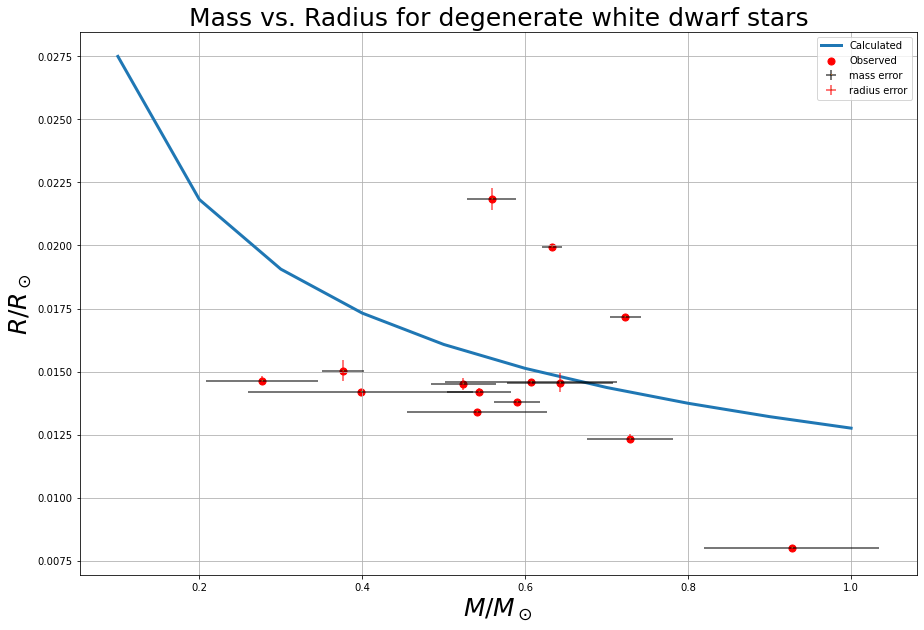

In [19]:
obs = MassRadiusObservations()
plt.figure(figsize = (15,10))
plt.plot(MRdf['$$\dfrac{M}{M_{\odot}}$$'],MRdf[ '$$\dfrac{R}{R_\odot}$$'],label = "Calculated",lw = 3)
plt.scatter(obs.masses,obs.radii/100,label = "Observed",color = "Red",s = 50)
plt.grid()
plt.xlabel("$M/M_\odot$",size = 25)
plt.ylabel("$R/R_\odot$",size = 25)
plt.title("Mass vs. Radius for degenerate white dwarf stars",size = 25)
plt.errorbar(obs.masses,obs.radii/100,0,obs.mass_errors,fmt=",",ecolor="black",alpha=0.7,label="mass error")
plt.errorbar(obs.masses,obs.radii/100,obs.radius_errors/100,0,fmt=",",ecolor="red",alpha=0.7,label="radius error")
plt.legend()
plt.show()

### - Realism:
    Our model is not exact but it closely resembles the actual observed data and certain points are within the actual error bars.